In [3]:
#importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast



<h1>Exploración inicial</h1>

In [4]:
#Cargamos el dataset
data = pd.read_csv("G:\Mi unidad\SOYHENRY\CIENCIA DE DATOS\CURSO\PROYECTOS\PI1_ML\datasetLimpio\datasetLimpio.csv")

In [61]:
#Mostranos las primeras filas para ver la estructura de los datos
data.head(6)

,budget,id,original_language,overview,popularity,revenue,runtime,status,tagline,title,...,release_year,release_month,release_day,return,nameBTC,name_genre,name_companie,pcountry,language,Director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Released,NaN,Toy Story,...,1995,10,30,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,...,1995,12,15,4.043035,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,...,1995,12,22,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,...,1995,12,22,5.090760,NaN,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,...,1995,2,10,0.000000,Father of the Bride Collection,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],Charles Shyer
5,60000000.0,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,187436818.0,170.0,Released,A Los Angeles Crime Saga,Heat,...,1995,12,15,3.123947,NaN,"['Action', 'Crime', 'Drama', 'Thriller']","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],"['English', 'Español']",Michael Mann


In [62]:
#obtenemos informacion basica sobre el dataset

print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45362 entries, 0 to 45361
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45362 non-null  float64
 1   id                 45362 non-null  int64  
 2   original_language  45351 non-null  object 
 3   overview           44421 non-null  object 
 4   popularity         45362 non-null  float64
 5   revenue            45362 non-null  float64
 6   runtime            45116 non-null  float64
 7   status             45282 non-null  object 
 8   tagline            20394 non-null  object 
 9   title              45362 non-null  object 
 10  vote_average       45362 non-null  float64
 11  vote_count         45362 non-null  float64
 12  release_year       45362 non-null  int64  
 13  release_month      45362 non-null  int64  
 14  release_day        45362 non-null  int64  
 15  return             45362 non-null  float64
 16  nameBTC            438

<h1> Estadísticas y distribuciones</h1>

<h2>Análisis univariado</h2>

<h3><b>Variables numéricas</b></h3>

In [25]:
data.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'release_month', 'release_day', 'return',
       'nameBTC', 'name_genre', 'name_companie', 'pcountry', 'language',
       'Director'],
      dtype='object')

In [63]:
#empezamos con un analisis general
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,return
count,4.536200e+04,45362.000000,45362.000000,4.536200e+04,45116.000000,45362.000000,45362.00000,45362.000000,45362.000000,45362.000000,4.536200e+04
mean,4.233889e+06,108023.910454,2.926575,1.123355e+07,94.180269,5.624188,110.11988,1991.879084,6.459173,14.209691,6.602465e+02
std,1.744240e+07,112168.292486,6.010351,6.439959e+07,38.342899,1.915241,491.81585,24.057110,3.628042,9.283445,7.470482e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,1874.000000,1.000000,1.000000,0.000000e+00
25%,0.000000e+00,26387.250000,0.388850,0.000000e+00,85.000000,5.000000,3.00000,1978.000000,3.000000,6.000000,0.000000e+00
50%,0.000000e+00,59855.000000,1.130354,0.000000e+00,95.000000,6.000000,10.00000,2001.000000,7.000000,14.000000,0.000000e+00
75%,0.000000e+00,156542.500000,3.692197,0.000000e+00,107.000000,6.800000,34.00000,2010.000000,10.000000,22.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.00000,2020.000000,12.000000,31.000000,1.239638e+07


In [43]:
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_month', 'release_day']

<h3>Histogramas y gráficos de densidad</h3>

C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\277885963.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, ax=ax)
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\277885963.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, ax=ax)
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\277885963.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, ax=ax)
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\277885963.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0

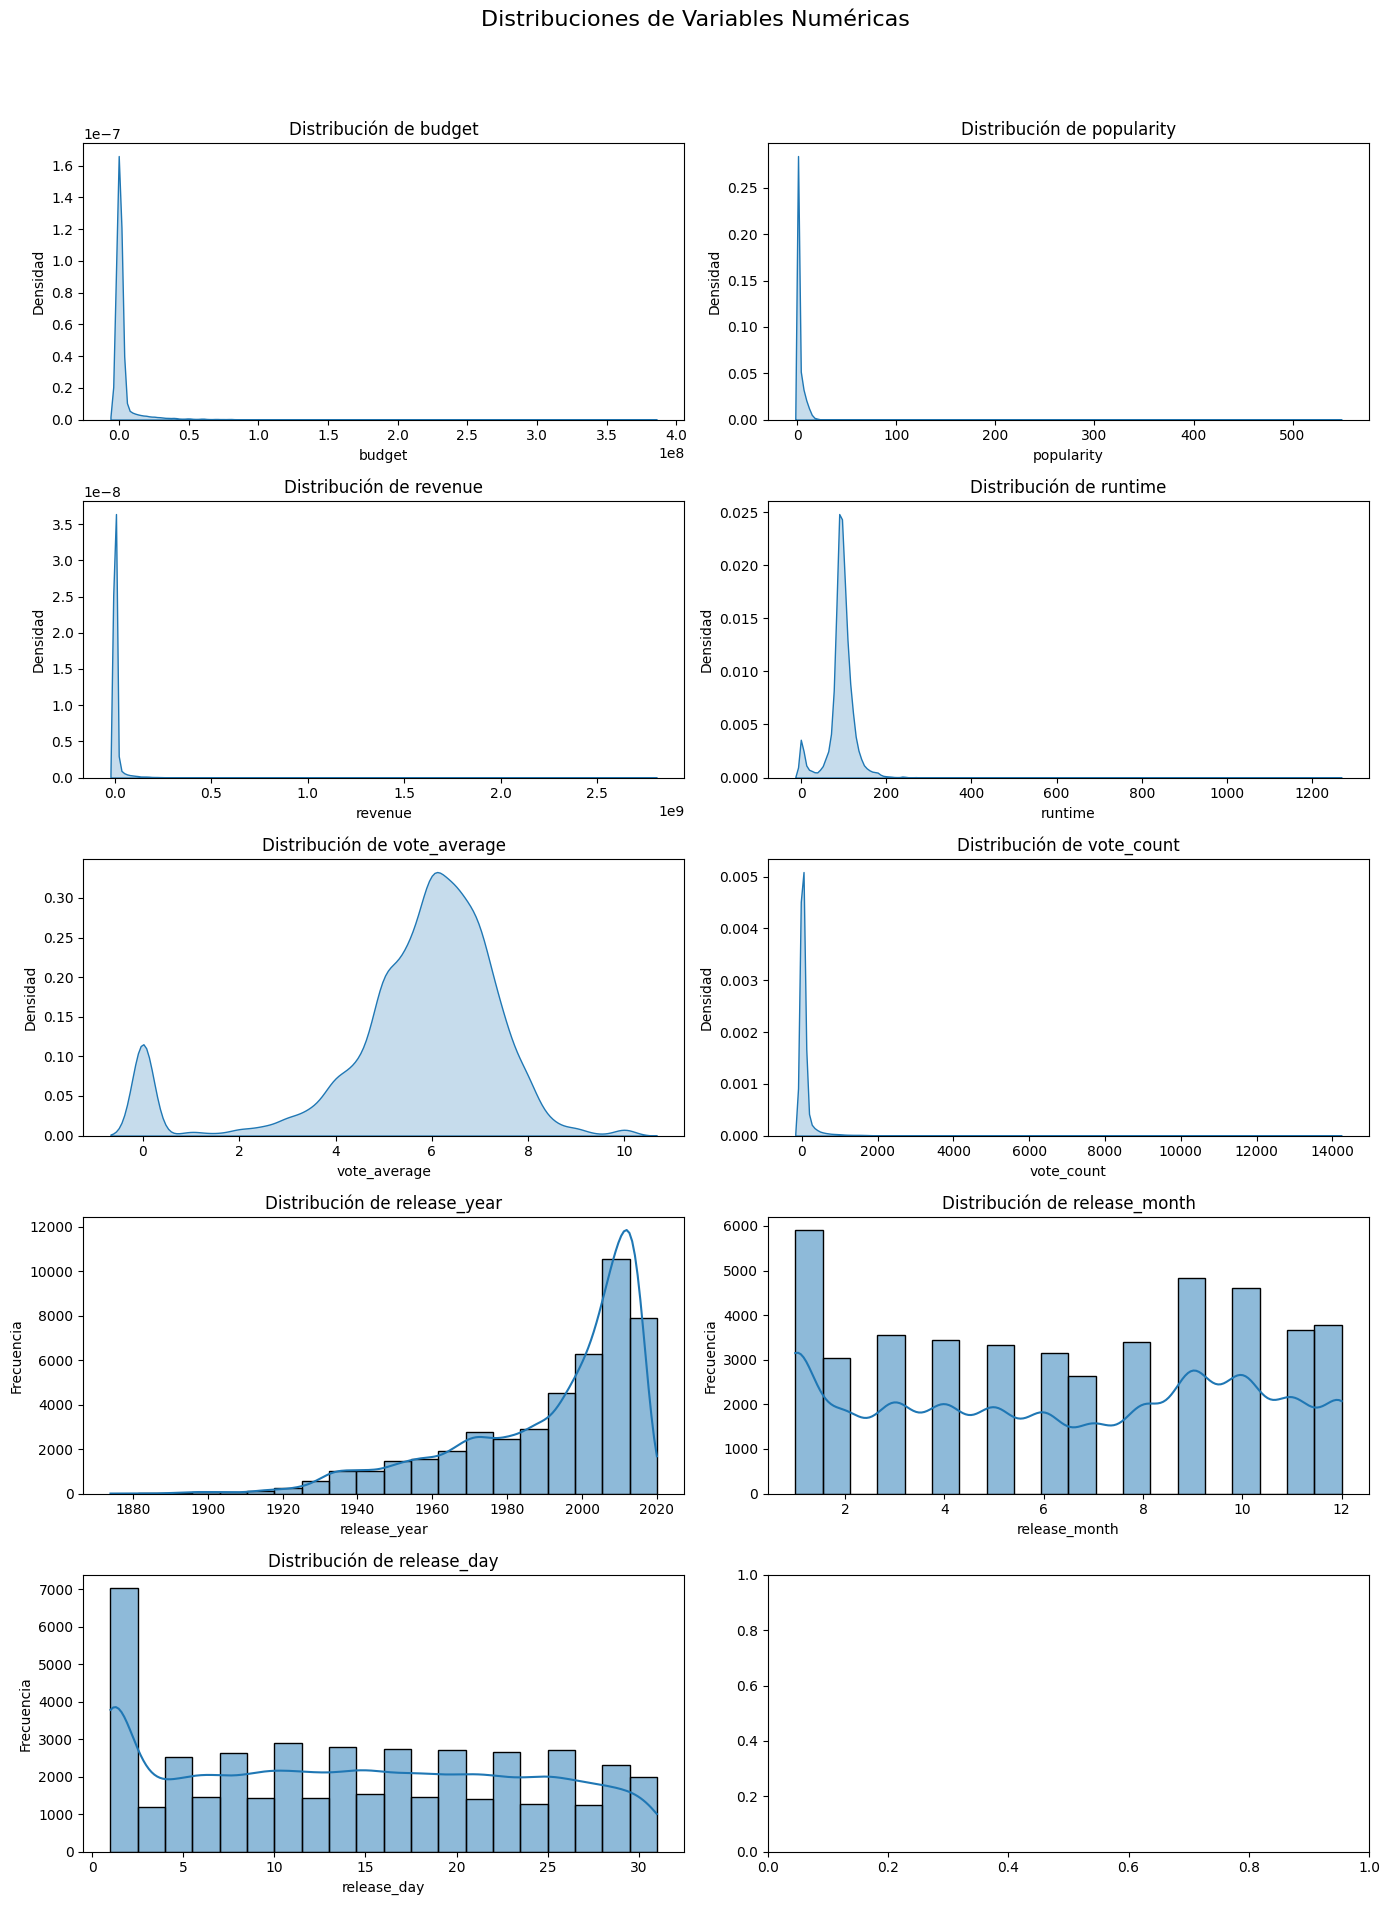

In [53]:
# Calcular el número de filas y columnas para los subplots
num_plots = len(numeric_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Crear subplots para histogramas y gráficos de densidad
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    if data[column].dtype != 'int64':
        sns.kdeplot(data[column], shade=True, ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Densidad')
    else:
        sns.histplot(data[column], bins=20, kde=True, ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#para columnas enteras, histograma, si no, grafico de densidad


<h3>Diagramas de caja</h3>

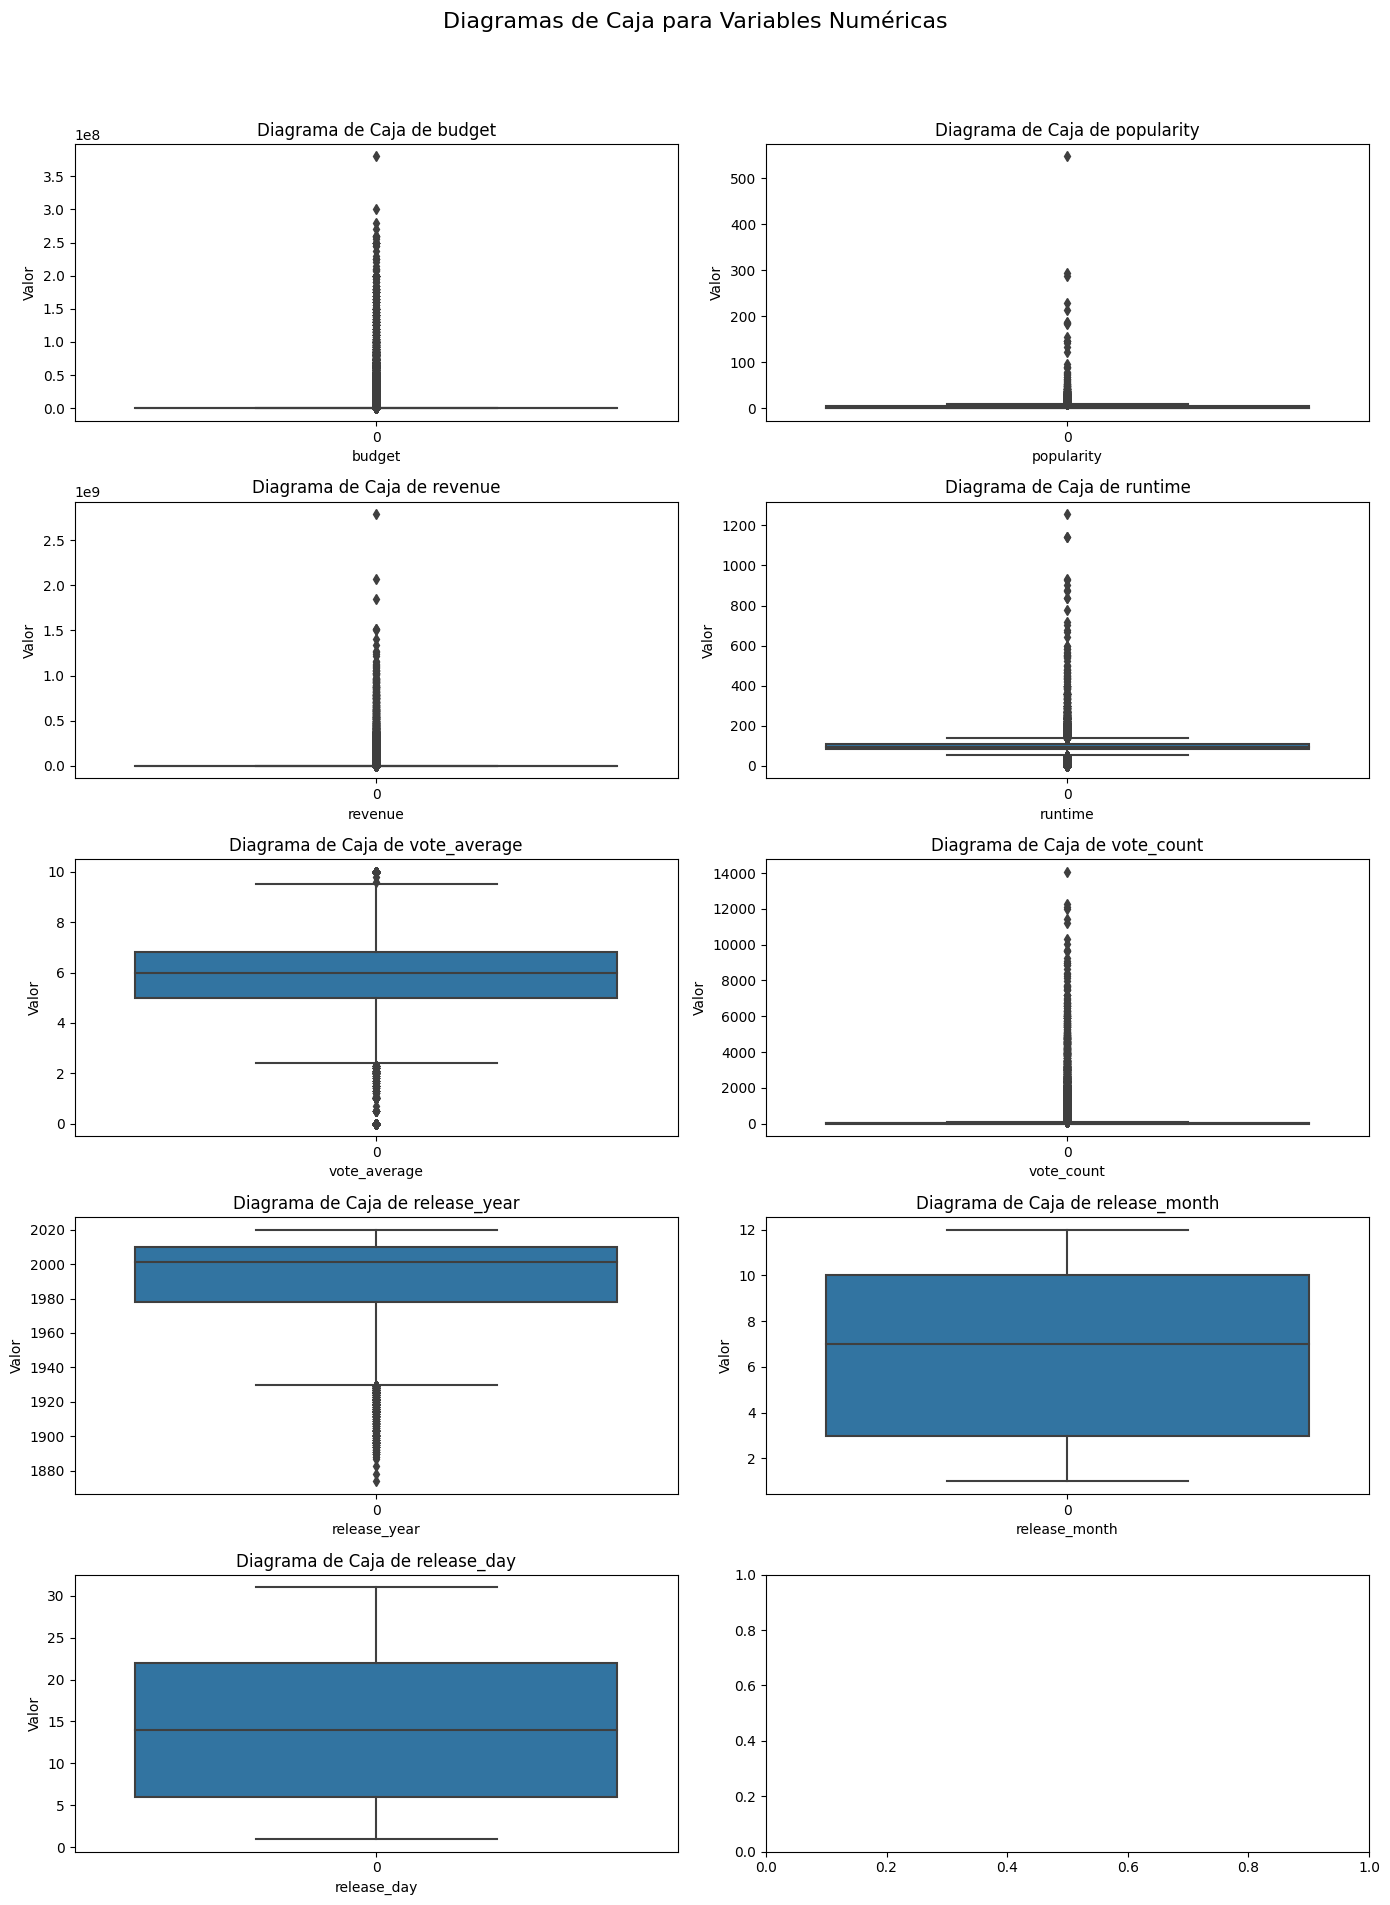

In [58]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))
fig.suptitle('Diagramas de Caja para Variables Numéricas', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=data[column], ax=ax)
    ax.set_title(f'Diagrama de Caja de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h3>Variables categóricas</h3>

In [5]:
#reconvertirmos en lista algunas columnas

data[["name_genre", "name_companie", "pcountry", "language"]] = data[["name_genre", "name_companie", "pcountry", "language"]].applymap(lambda x: list(ast.literal_eval(x)))


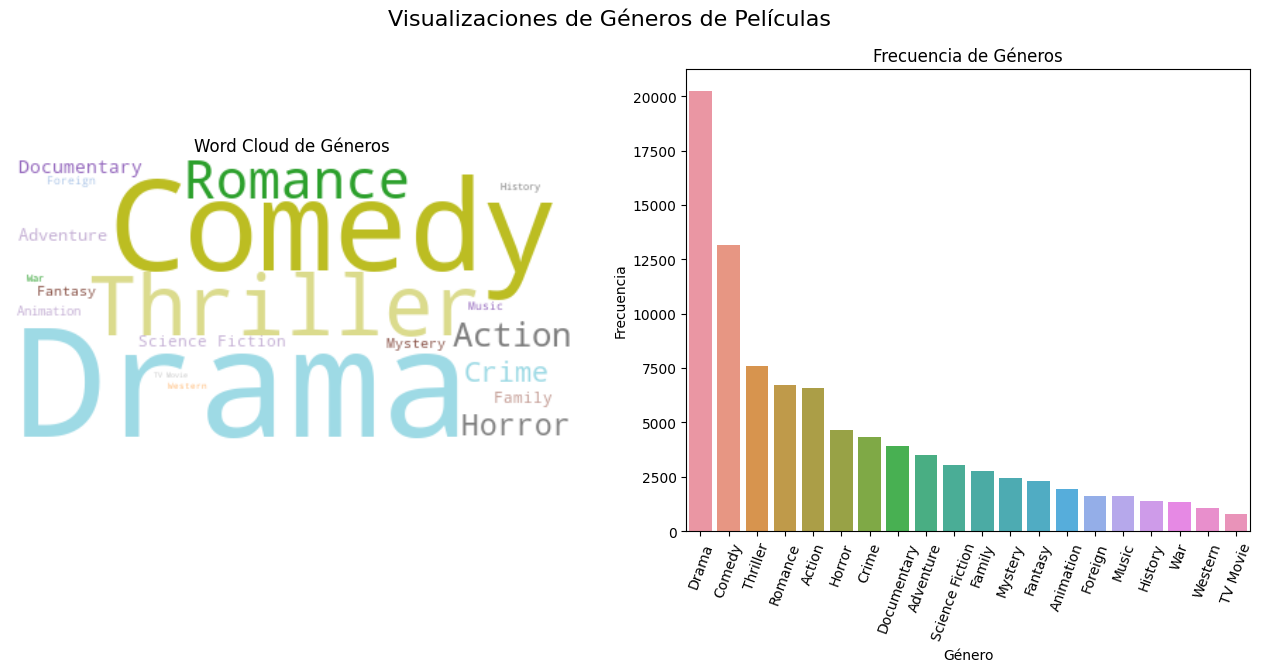

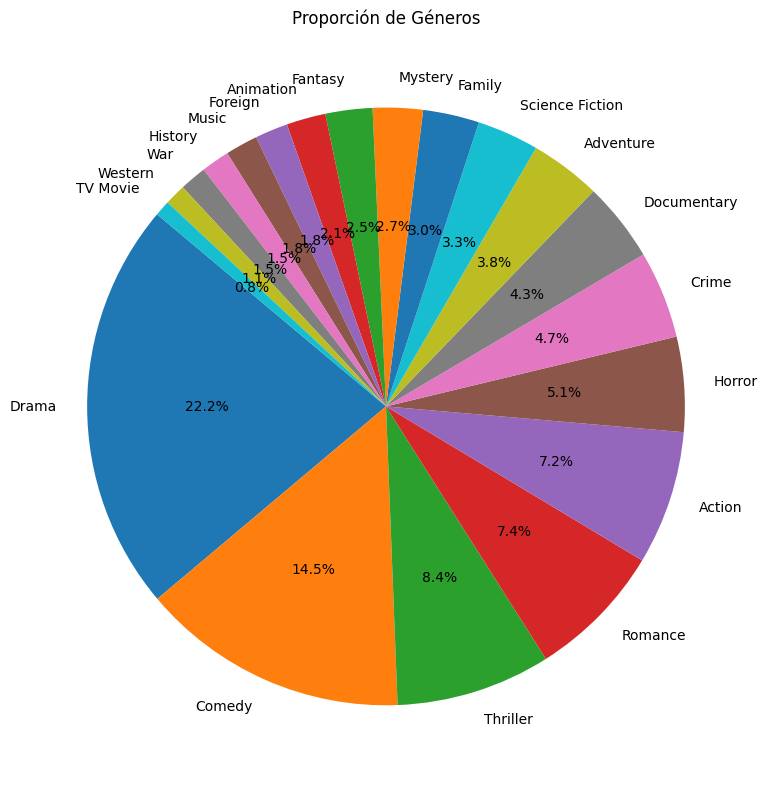

In [18]:
#Para la columna "name_genre"

genre_counts = data["name_genre"].explode().value_counts()


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Géneros de Películas', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(genre_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Géneros')

# gráfico de barras
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Géneros')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=70)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Géneros')

# Ajustar los subplots
plt.tight_layout()




"""
# Calcular la frecuencia de géneros por año
genre_year_counts = data["name_genre"].explode().groupby(['release_year', 'name_genre']).size().reset_index(name='counts')

# Gráfico de Barras Agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='counts', hue='name_genre', data=genre_year_counts)
plt.title('Frecuencia de Géneros por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Género')

"""
plt.show()




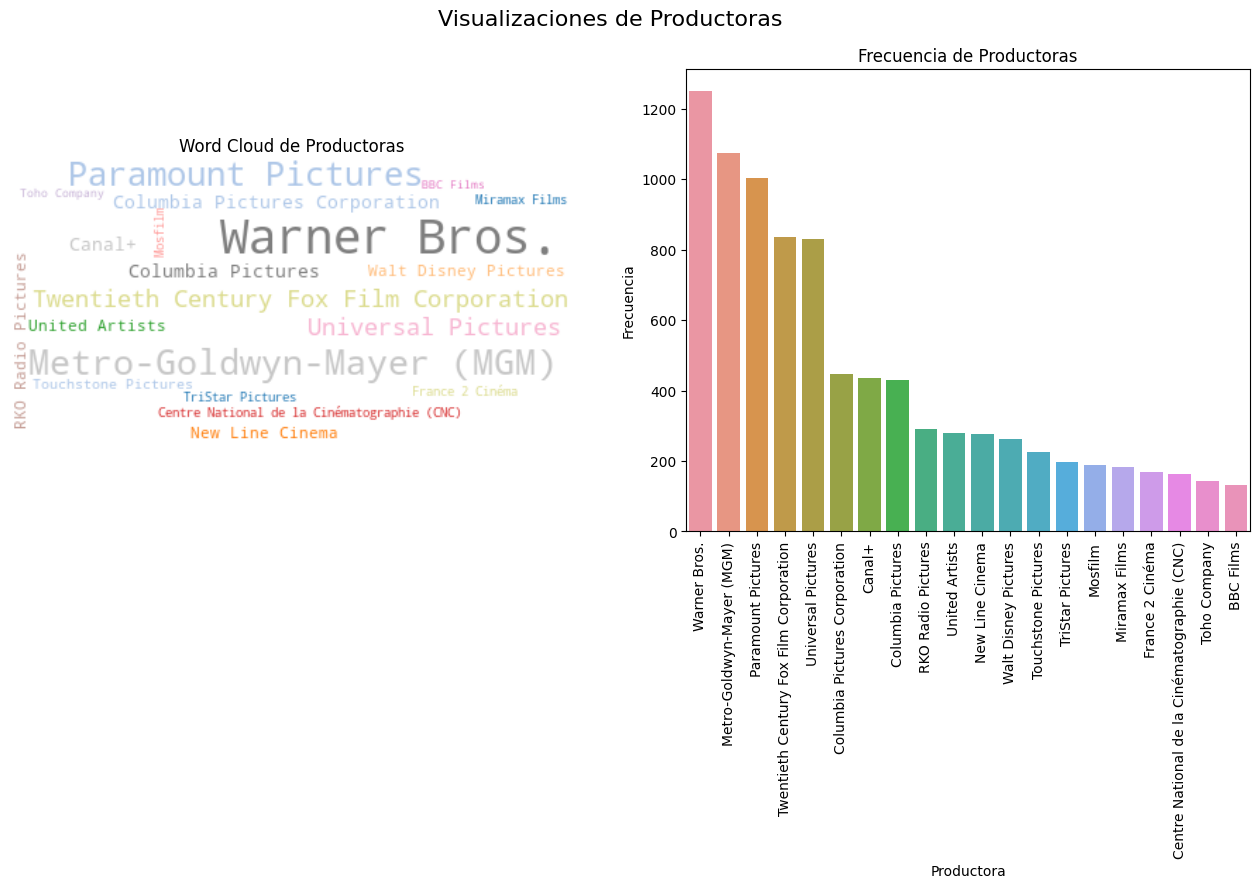

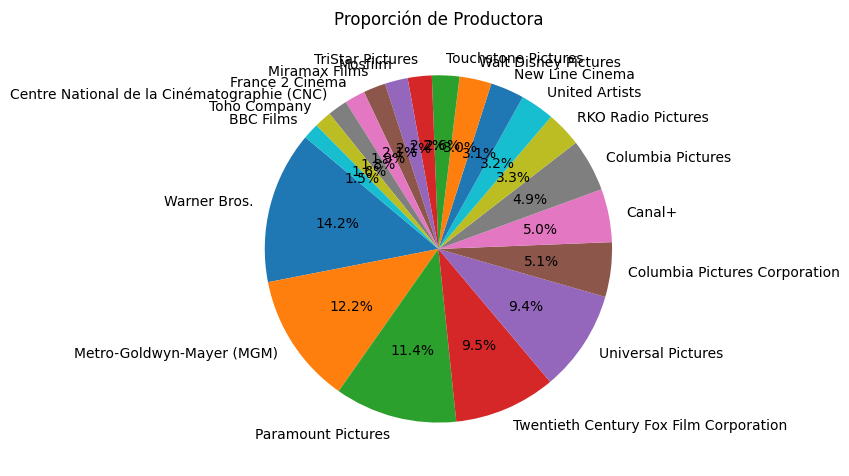

In [11]:
#Para la columna "name_companie"

companie_counts = data["name_companie"].explode().value_counts().head(20)


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Productoras', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(companie_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Productoras')

# gráfico de barras
sns.barplot(x=companie_counts.index, y=companie_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Productoras')
axs[1].set_xlabel('Productora')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=90)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(companie_counts, labels=companie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Productora')

# Ajustar los subplots
plt.tight_layout()

plt.show()

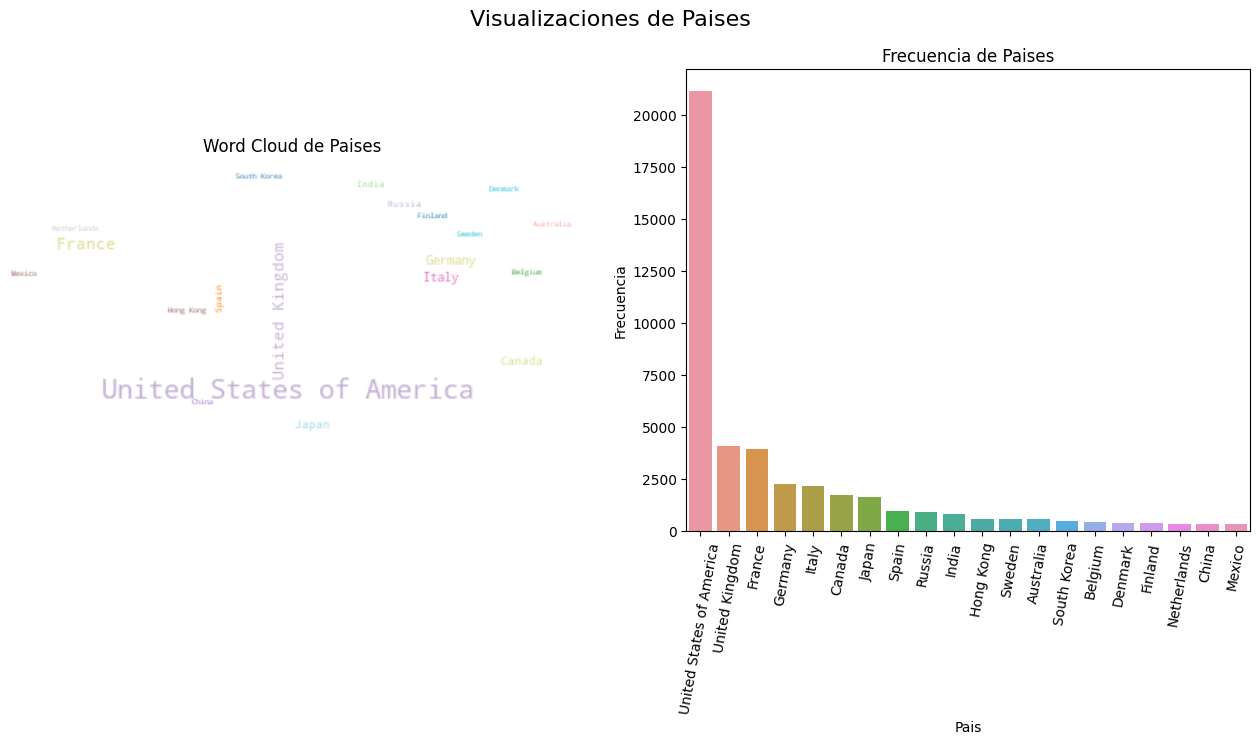

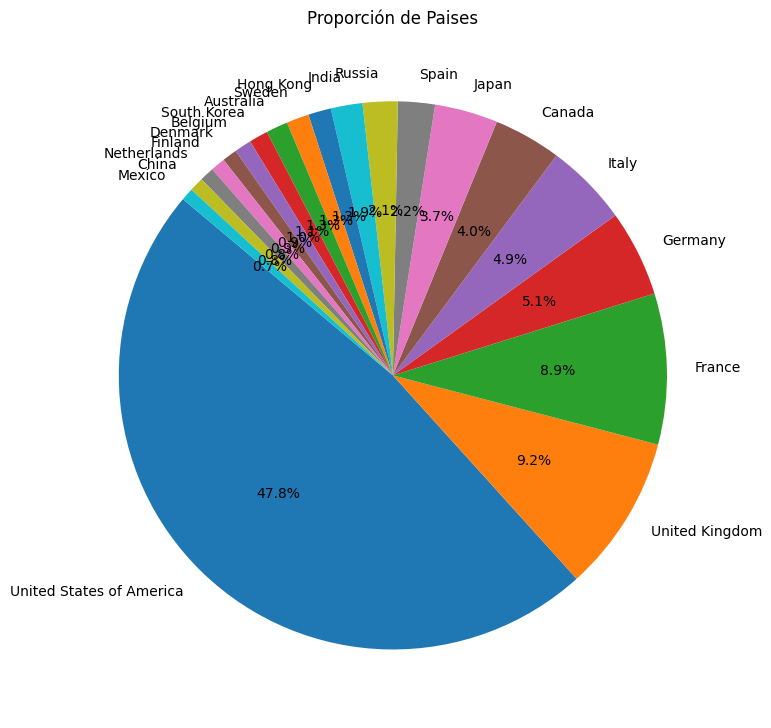

In [21]:
#Para la columna "pcountry"

country_counts = data["pcountry"].explode().value_counts().head(20)


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Paises', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(country_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Paises')

# gráfico de barras
sns.barplot(x=country_counts.index, y=country_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Paises')
axs[1].set_xlabel('Pais')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=80)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Paises')

# Ajustar los subplots
plt.tight_layout()

plt.show()

C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  plt.tight_layout()
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  plt.tight_layout()
C:\Users\jhose\AppData\Local\Temp\ipykernel_35316\1621318188.py:31: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) miss

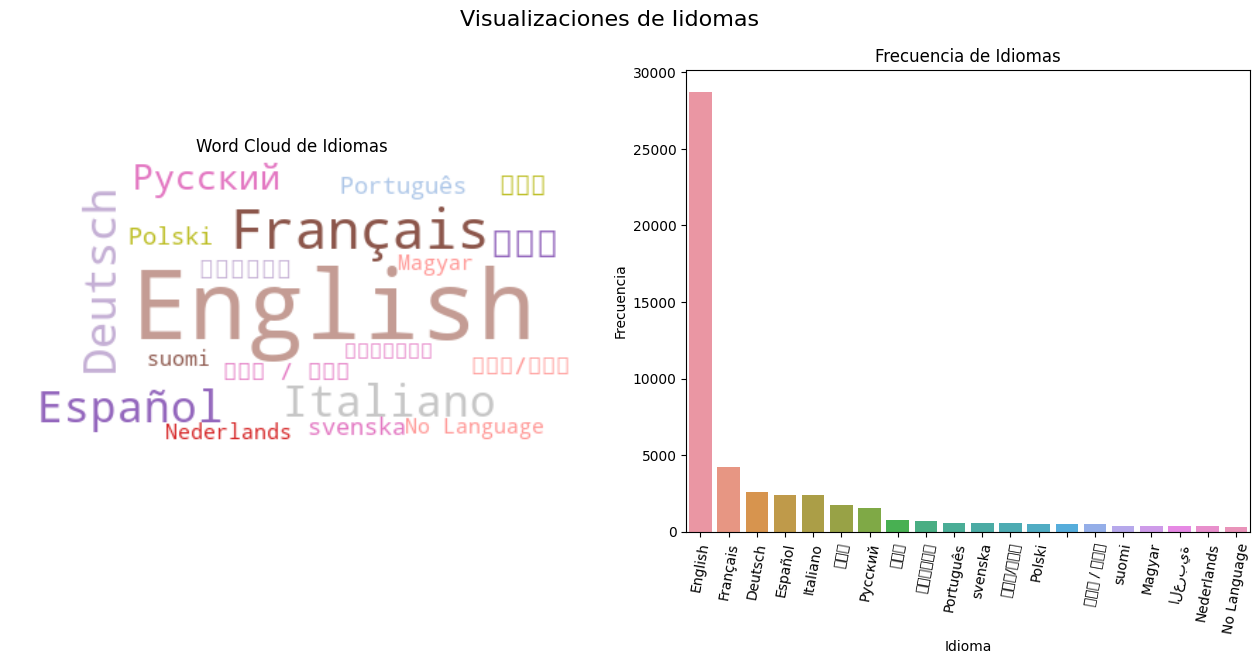

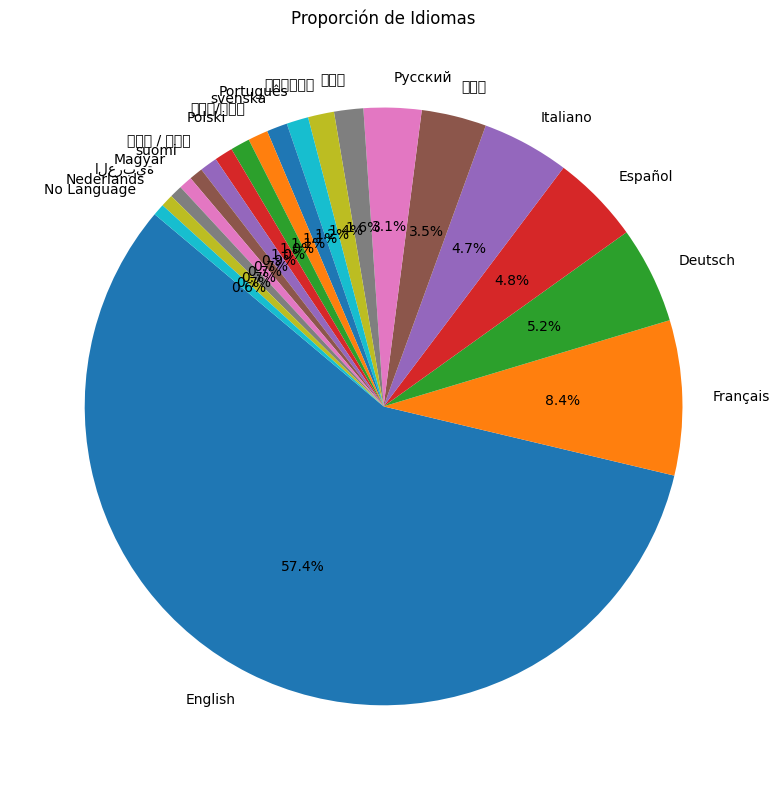

In [22]:
#Para la columna "language"

language_counts = data["language"].explode().value_counts().head(20)


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Iidomas', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(language_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Idiomas')

# gráfico de barras
sns.barplot(x=language_counts.index, y=language_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Idiomas')
axs[1].set_xlabel('Idioma')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=80)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Idiomas')

# Ajustar los subplots
plt.tight_layout()

plt.show()

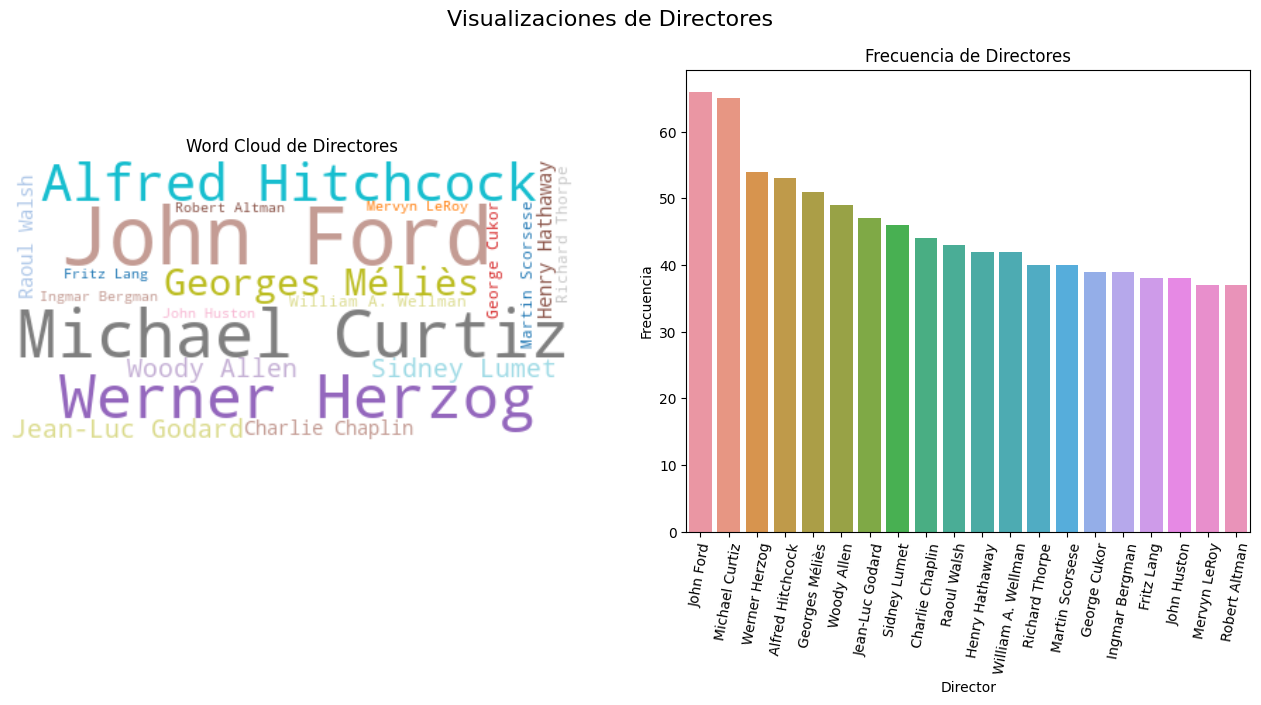

In [31]:
#Para la columna "Director"
director_counts = data["Director"].value_counts().head(20)

# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Directores', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(director_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Directores')

# gráfico de barras
sns.barplot(x=director_counts.index, y=director_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Directores')
axs[1].set_xlabel('Director')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=80)

plt.show()


Released           44923
Rumored              229
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64


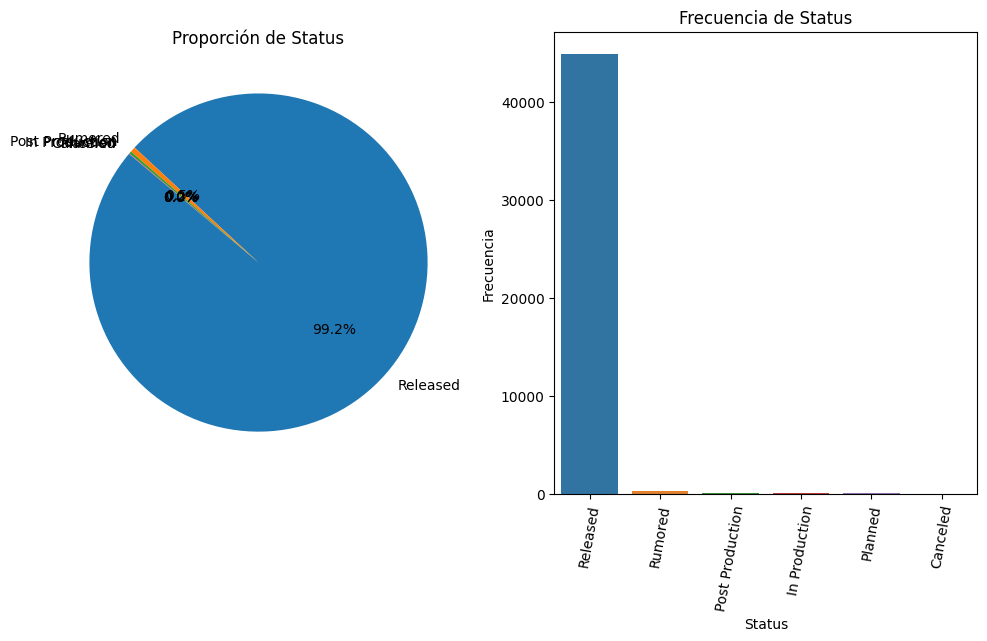

In [39]:
#Para la columna "status"

status_counts = data["status"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


print(status_counts)

# pastel
axs[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Proporción de Status')

#grafico de barras
sns.barplot(x=status_counts.index, y=status_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Status')
axs[1].set_xlabel('Status')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=80)

<h1>Análisis bivariable</h1>

<h3>Diagrama de dispersión en pares para todos las columnas numéricas</h3>

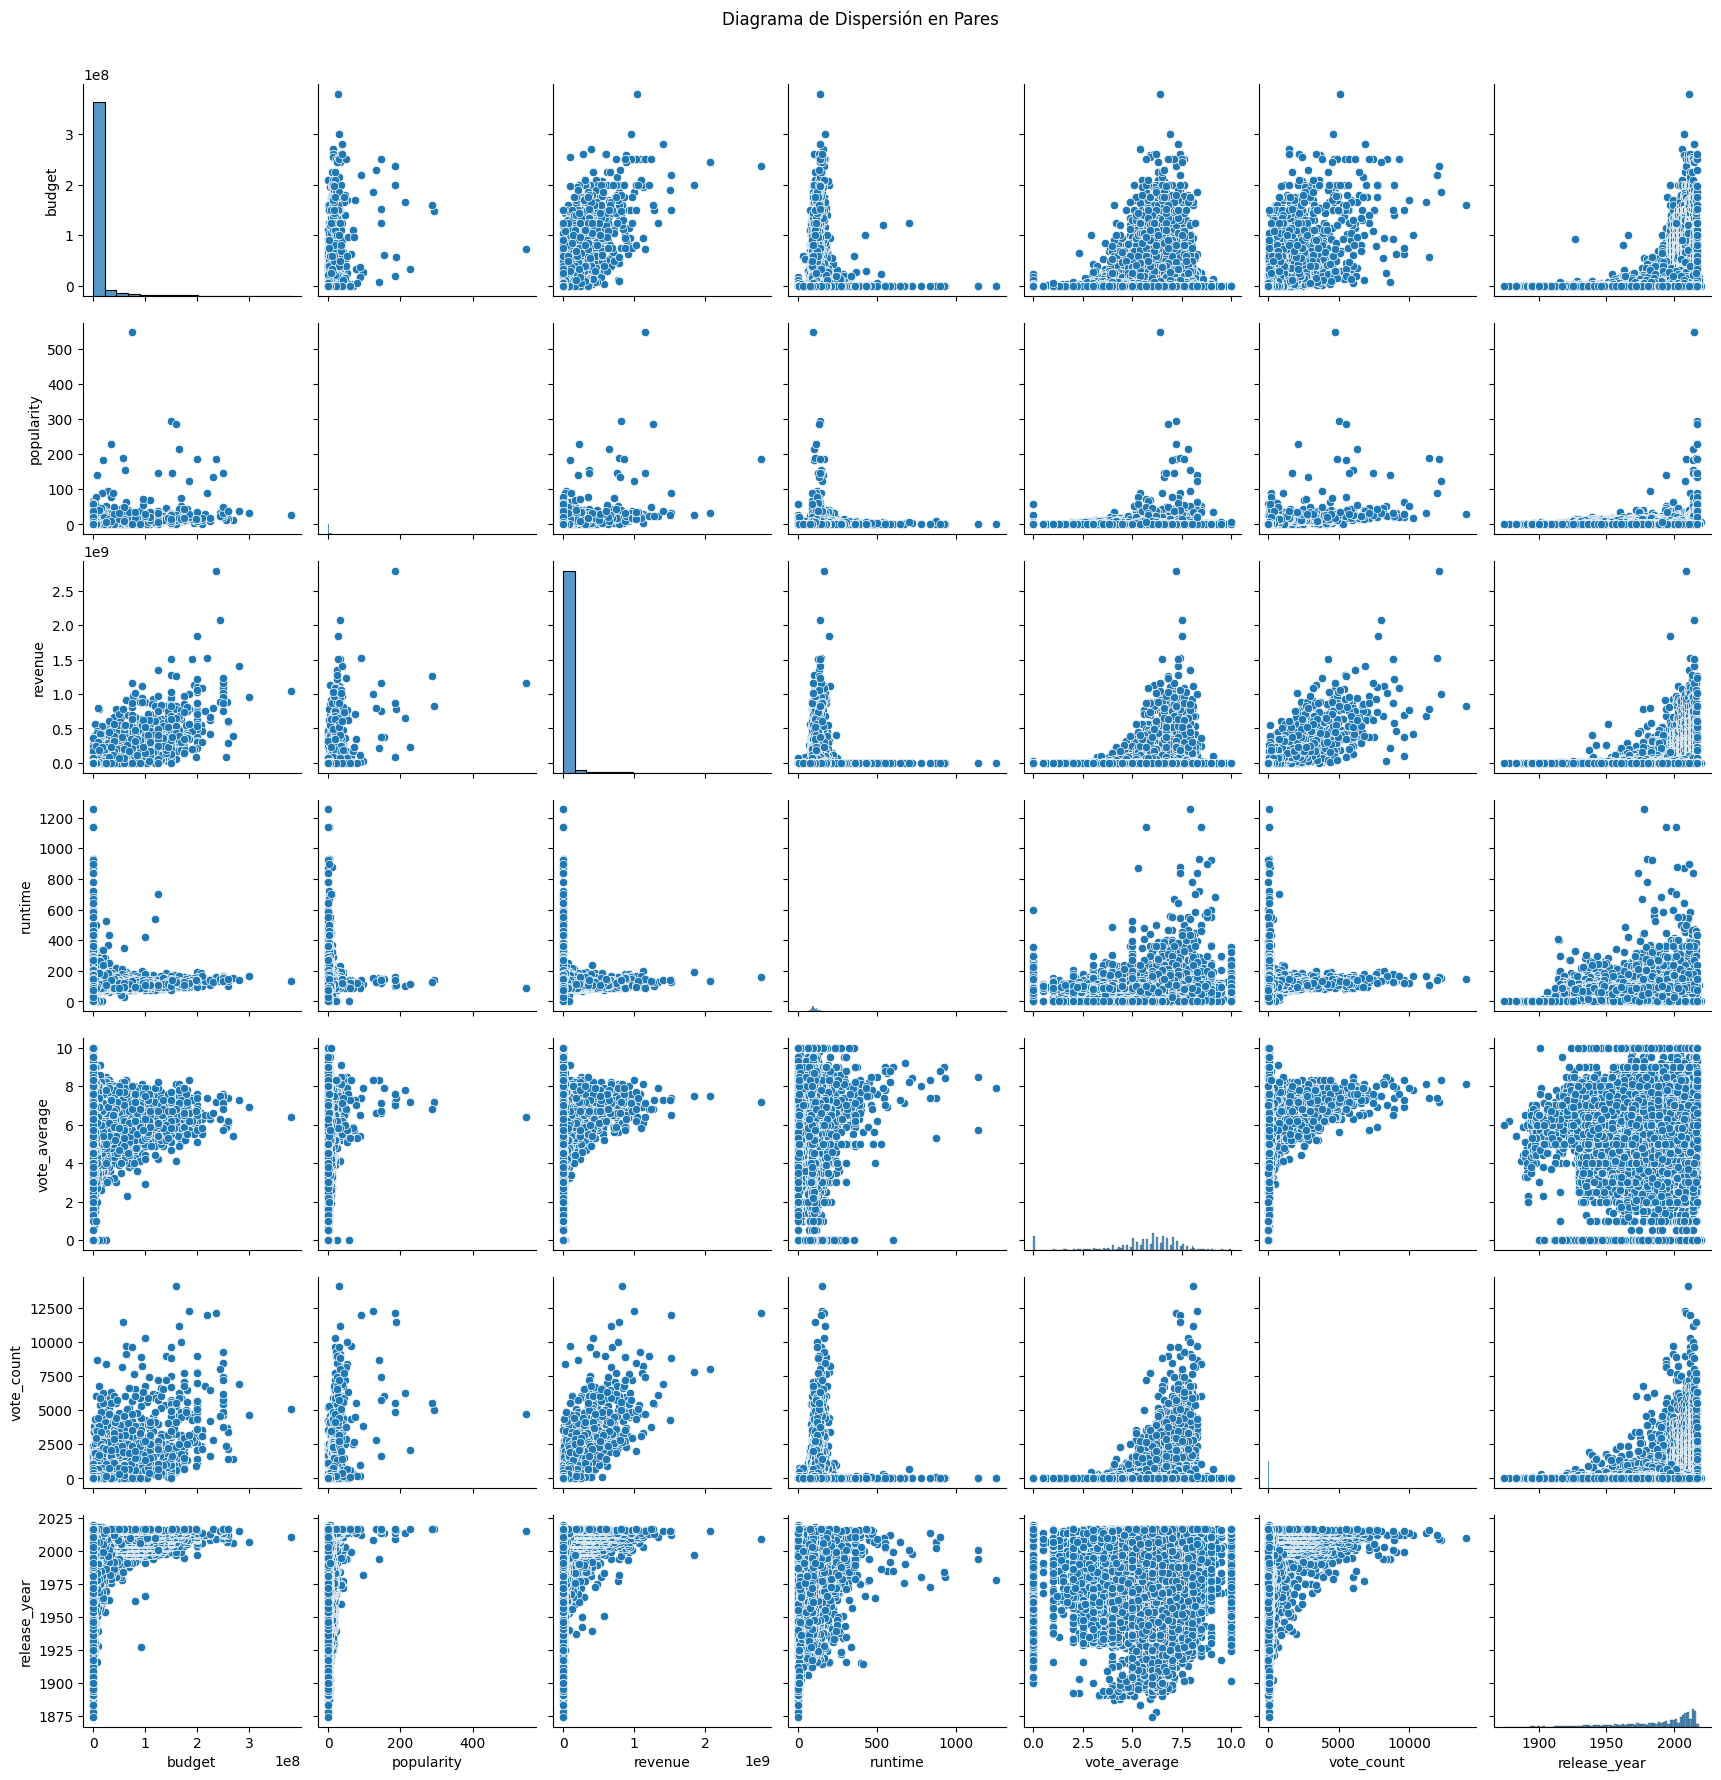

In [42]:
#Grafica de dispersion en pares para columnas numéricas
sns.pairplot(data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year']])
plt.suptitle('Diagrama de Dispersión en Pares', y=1.02)
plt.show()

<h3>Matriz de correlación</h3>

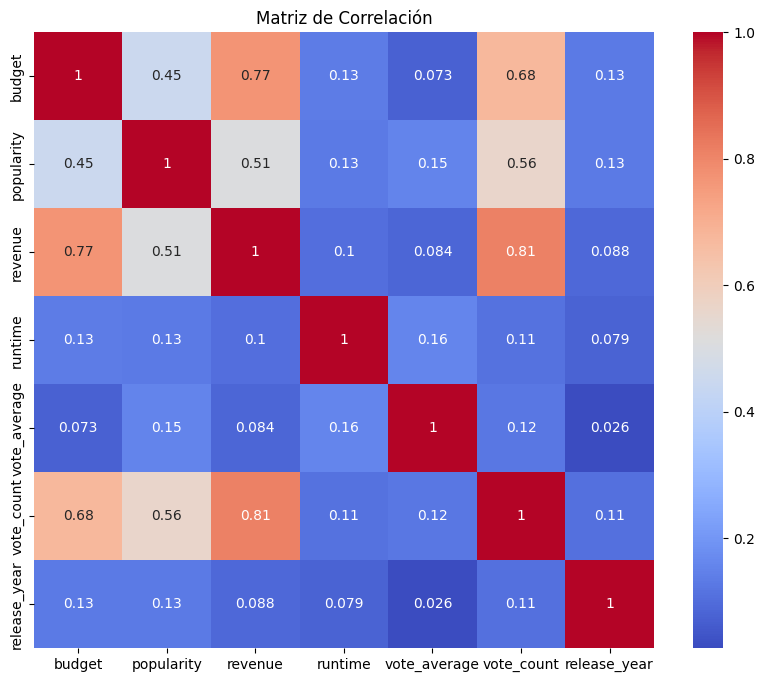

In [59]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

<h3> Género vs Popularidad </h3>

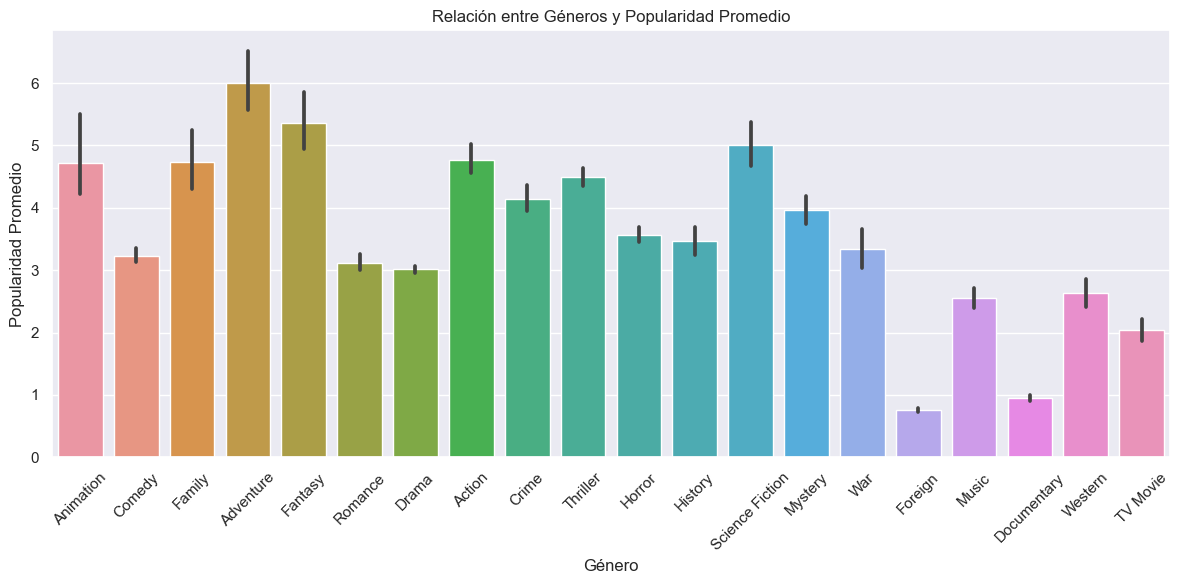

In [64]:
genre_popularity = []

for genres, popularity in zip(data['name_genre'], data['popularity']):
    for genre in genres:
        genre_popularity.append({'genero': genre, 'popularidad': popularity})

new_df = pd.DataFrame(genre_popularity)

# Configurar el estilo de seaborn
sns.set()

# Crear un gráfico de barras que relaciona géneros con popularidad promedio
plt.figure(figsize=(12, 6))
sns.barplot(x='genero', y='popularidad', data=new_df, estimator='mean')  
plt.title('Relación entre Géneros y Popularidad Promedio')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Popularidad vs Paises de producción</h3>

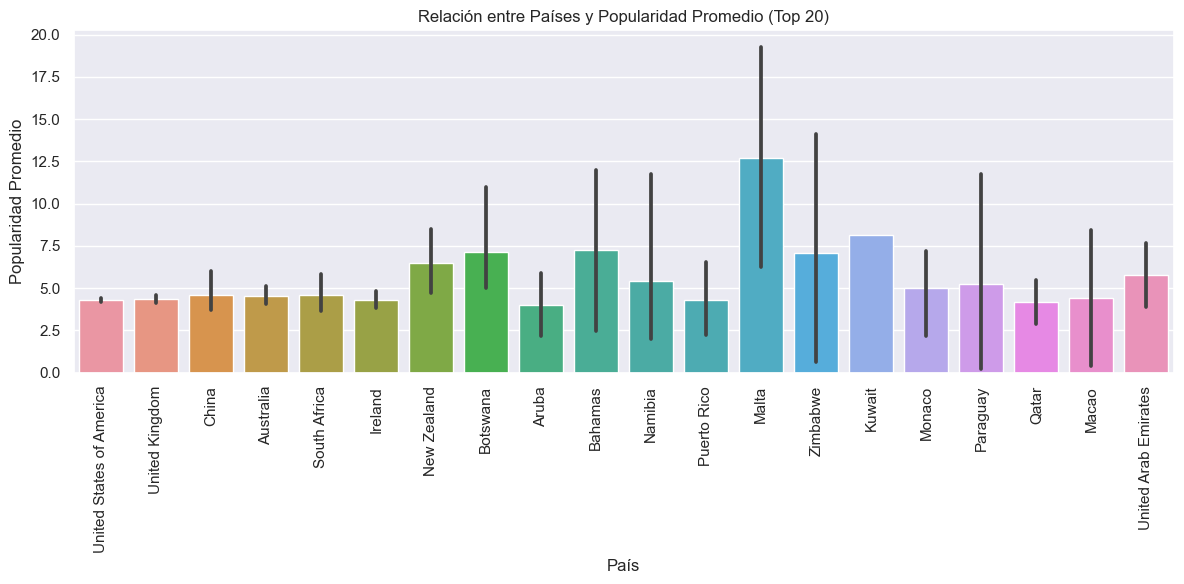

In [77]:
country_popularity = []

for countries, popularity in zip(data['pcountry'], data['popularity']):
    for country in countries:
        country_popularity.append({'paises': country, 'popularidad': popularity})

new_df = pd.DataFrame(country_popularity)

# Seleccionar los 20 países más populares
top_countries = new_df.groupby('paises')['popularidad'].mean().sort_values(ascending=False).head(20)
top_countries_df = new_df[new_df['paises'].isin(top_countries.index)]

# Configurar el estilo de seaborn
sns.set()

# Crear un gráfico de barras que relaciona países con popularidad promedio
plt.figure(figsize=(12, 6))
sns.barplot(x='paises', y='popularidad', data=top_countries_df, estimator='mean')  
plt.title('Relación entre Países y Popularidad Promedio (Top 20)')
plt.xlabel('País')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





